# Machine Learning Kidney Disease Prediction

In [3]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [4]:
# Reading the dataset
kidney_df= pd.read_csv('../Data/kidney_disease.csv')
# Printing the first 5 rows of the dataframe.
kidney_df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
# information about the dataset
kidney_df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
# drop unwanted columns
kidney_df.drop('id', axis = 1, inplace = True)

In [7]:
# rename column names to make it more user-friendly

kidney_df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [8]:
#As we can see that 'packed_cell_volume', 'white_blood_cell_count' and 'red_blood_cell_count' are object type. We need to change them to numerical dtype.
# converting necessary columns to numerical type

kidney_df['packed_cell_volume'] = pd.to_numeric(kidney_df['packed_cell_volume'], errors='coerce')
kidney_df['white_blood_cell_count'] = pd.to_numeric(kidney_df['white_blood_cell_count'], errors='coerce')
kidney_df['red_blood_cell_count'] = pd.to_numeric(kidney_df['red_blood_cell_count'], errors='coerce')


In [9]:
# Extracting categorical and numerical columns

cat_cols = [col for col in kidney_df.columns if kidney_df[col].dtype == 'object']
num_cols = [col for col in kidney_df.columns if kidney_df[col].dtype != 'object']

In [10]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {kidney_df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [11]:
#There is some ambugity present in the columns we have to remove that.

# replace incorrect values

kidney_df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

kidney_df['coronary_artery_disease'] = kidney_df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

kidney_df['class'] = kidney_df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [12]:
kidney_df['class'] = kidney_df['class'].map({'ckd': 0, 'not ckd': 1})
kidney_df['class'] = pd.to_numeric(kidney_df['class'], errors='coerce')

In [13]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {kidney_df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [0 1] values



In [14]:
kidney_df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [15]:
# checking for null values

kidney_df.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [16]:
kidney_df[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [17]:
kidney_df[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [18]:
# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = kidney_df[feature].dropna().sample(kidney_df[feature].isna().sum())
    random_sample.index = kidney_df[kidney_df[feature].isnull()].index
    kidney_df.loc[kidney_df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = kidney_df[feature].mode()[0]
    kidney_df[feature] = kidney_df[feature].fillna(mode)

In [19]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)

In [20]:
kidney_df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [21]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

In [22]:
kidney_df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [23]:
for col in cat_cols:
    print(f"{col} has {kidney_df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

class has 2 categories



In [24]:
#As all of the categorical columns have 2 categories we can use label encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    kidney_df[col] = le.fit_transform(kidney_df[col])

In [25]:
ind_col = [col for col in kidney_df.columns if col != 'class']
dep_col = 'class'

x = kidney_df[ind_col]
y = kidney_df[dep_col]

In [26]:
# splitting data into training and test set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

- Models :

- Model 1 : Logistic Regression
- Model 2 : KNearestNeighbors
- Model 3 : SVM
- Model 4 : Decision Tree
- Model 5 : Random Forest
- Model 6 : Gradient Boosting
- Model 7 : XGBoost

-  This approach will help us to keep the predictions much more accurate.
- In the below code we will be training all the seven models on the train data, checking the quality of our models using a accuracy.


In [27]:
accuracies={}
from sklearn.metrics import accuracy_score

# Model 1 : Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)

y_pred1 = lr.predict(x_test)

acc1=accuracy_score(y_test,y_pred1)
accuracies['LR']=acc1*100

print("Training accuracy score of the model is:",accuracy_score(y_train, lr.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred1)*100,"%")

Training accuracy score of the model is: 90.35714285714286 %
Testing accuracy score of the model is: 91.66666666666666 %


# Model 2 : KNearestNeighbors

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

knn.fit(x_train,y_train)

y_pred2 = knn.predict(x_test)

acc2=accuracy_score(y_test,y_pred2)
accuracies['KNN']=acc2*100

print("Training accuracy score of the model is:",accuracy_score(y_train, knn.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred2)*100,"%")

Training accuracy score of the model is: 77.85714285714286 %
Testing accuracy score of the model is: 69.16666666666667 %


# Model 3 : SVM

In [30]:
from sklearn.svm import SVC

svc = SVC(C = 10, gamma = 0.01, probability=True)
svc.fit(x_train, y_train)

y_pred3 = svc.predict(x_test)

acc3=accuracy_score(y_test,y_pred3)
accuracies['SVM']=acc3*100

print("Training accuracy score of the model is:",accuracy_score(y_train, svc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred3)*100,"%")

Training accuracy score of the model is: 100.0 %
Testing accuracy score of the model is: 60.0 %


# Model 4 : Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion= 'entropy', max_depth= 19, min_samples_leaf= 4, min_samples_split= 6, splitter= 'random')
dtc.fit(x_train, y_train)

y_pred4 = dtc.predict(x_test)

acc4=accuracy_score(y_test,y_pred4)
accuracies['DT']=acc4*100

print("Training accuracy score of the model is:",accuracy_score(y_train, dtc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred4)*100,"%")

Training accuracy score of the model is: 98.92857142857143 %
Testing accuracy score of the model is: 95.83333333333334 %


# Model 5 : Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf = 5, 
                                min_samples_split = 2, n_estimators = 400)
rfc.fit(x_train, y_train)

y_pred5 = rfc.predict(x_test)

acc5=accuracy_score(y_test,y_pred5)
accuracies['RF'] = acc5 * 100

print("Training accuracy score of the model is:",accuracy_score(y_train, rfc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred5)*100,"%")

Training accuracy score of the model is: 100.0 %
Testing accuracy score of the model is: 99.16666666666667 %


# Model 6 : Gradient Boosting

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'log_loss', n_estimators = 400)
gbc.fit(x_train, y_train)

y_pred6 = gbc.predict(x_test)

acc6 = accuracy_score(y_test,y_pred6)
accuracies['GradientBoosting']=acc6*100

print("Training accuracy score of the model is:",accuracy_score(y_train, gbc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred6)*100,"%")

Training accuracy score of the model is: 100.0 %
Testing accuracy score of the model is: 97.5 %


# Model 7 : XGBoost

In [34]:
from xgboost import XGBClassifier 

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 5, n_estimators = 400)

xgb.fit(x_train, y_train)
y_pred7 = xgb.predict(x_test)

acc7=accuracy_score(y_test,y_pred7)

accuracies['XGBoost']=acc7*100
print("Training accuracy score of the model is:",accuracy_score(y_train, xgb.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred7)*100,"%")

Training accuracy score of the model is: 100.0 %
Testing accuracy score of the model is: 98.33333333333333 %


In [35]:
# Model Comparison
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM',  'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XgBoost'],
    'Score': [acc1, acc2, acc3, acc4, acc5, acc6, acc7]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,Random Forest,0.991667
6,XgBoost,0.983333
5,Gradient Boosting,0.975000
3,Decision Tree,0.958333
0,Logistic Regression,0.916667
1,KNN,0.691667
2,SVM,0.600000


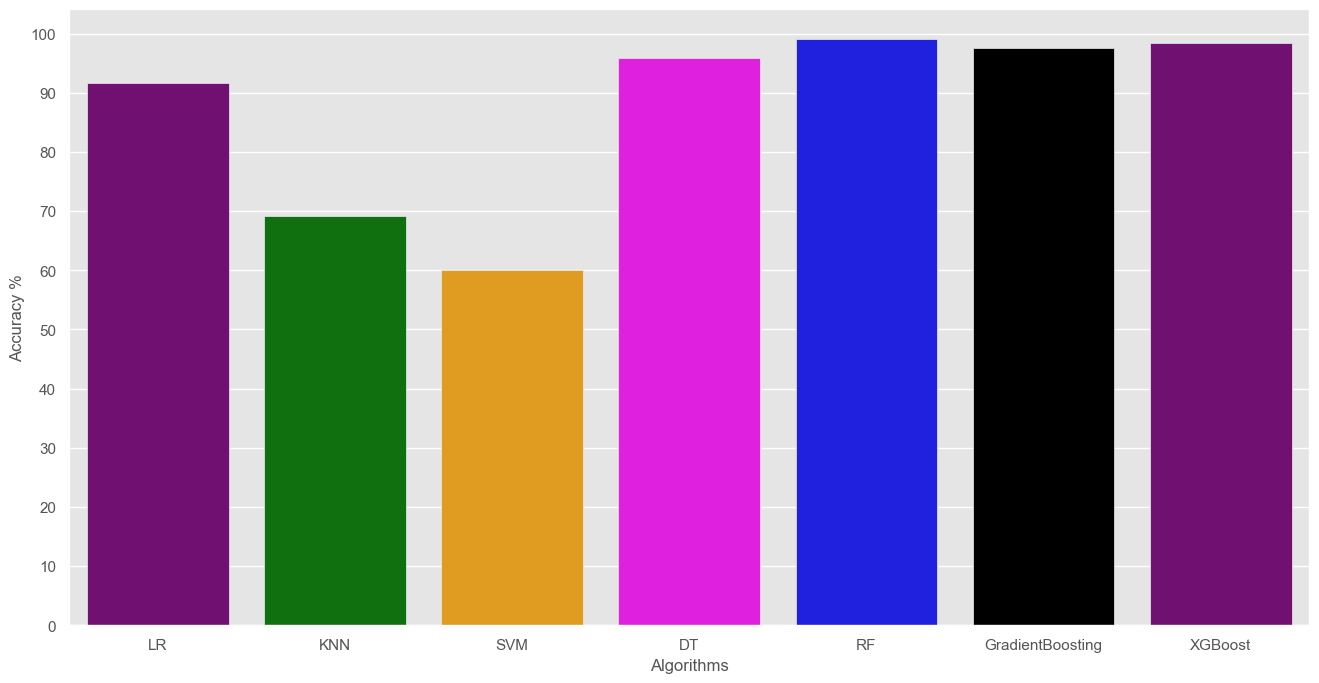

In [36]:
colors = ["purple", "green", "orange", "magenta","blue","black"]

# sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,1200,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors )
plt.show()

- Model 5 :  Random Forest has the highest accuracy

In [37]:
import pickle
model = rfc
pickle.dump(model, open("../Models/kidney.pkl",'wb'))

In [38]:
type(model)

sklearn.ensemble._forest.RandomForestClassifier

In [41]:
import numpy as np

non_ckd_input = np.array([[45, 80, 1.025, 1, 0, 1, 1, 0, 0, 90, 18, 0.9, 140, 4.5, 15, 44, 8000, 5.2, 0, 0, 0, 1, 0, 0]])  
non_ckd_input = non_ckd_input.reshape(1, -1)

prediction = model.predict(non_ckd_input)
print("Kidney Disease Diagnosis:", "CKD" if prediction[0] == 1 else "Non-CKD")



Kidney Disease Diagnosis: CKD


In [42]:
ckd_input = np.array([[65, 150, 1.010, 4, 2, 0, 0, 1, 1, 200, 90, 5.2, 130, 5.8, 7.5, 30, 6700, 3.0, 1, 1, 1, 0, 1, 1]])  
ckd_input = ckd_input.reshape(1, -1)

prediction = model.predict(ckd_input)
print("Kidney Disease Diagnosis:", "CKD" if prediction[0] == 1 else "Non-CKD")


Kidney Disease Diagnosis: Non-CKD
